## Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    AdaBoostClassifier,
)
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
)

import warnings

warnings.filterwarnings(category=Warning, action="ignore")

## Load csv data to Dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/My Drive/project/alzheimers_disease_data.csv'
data = pd.read_csv(file_path)

Mounted at /content/drive


In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/zunhnin/alzheimers_disease/refs/heads/main/alzheimers_disease_data.csv")

In [ ]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Dataset Information

---
- **PatientID**: A unique identifier assigned to each patient (4751 to 6900).
- **Age**: The age of the patients ranges from 60 to 90 years.
- **Gender**: 0 represent male and 1 represent female.
- **Ethnicity**: The ethnicity of the patients, coded as follows:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other
- **EducationLevel**: The education level of the patients, coded as follows:
  - 0: None
  - 1: High School
  - 2: Bachelor's
  - 3: Higher
- **BMI**: Body Mass Index of the patients, ranging from 15 to 40.
- **Smoking**: Smoking status, where 0 indicates No and 1 indicates Yes.
- **AlcoholConsumption**: Weekly alcohol consumption in units, ranging from 0 to 20.
- **PhysicalActivity**: Weekly physical activity in hours, ranging from 0 to 10.
- **DietQuality**: Diet quality score, ranging from 0 to 10.
- **SleepQuality**: Sleep quality score, ranging from 4 to 10.
- **FamilyHistoryAlzheimers**: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
- **CardiovascularDisease**: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
- **Diabetes**: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
- **Depression**: Presence of depression, where 0 indicates No and 1 indicates Yes.
- **HeadInjury**: History of head injury, where 0 indicates No and 1 indicates Yes.
- **Hypertension**: Presence of hypertension, where 0 indicates No and 1 indicates Yes.
- **SystolicBP**: Systolic blood pressure, ranging from 90 to 180 mmHg.
- **DiastolicBP**: Diastolic blood pressure, ranging from 60 to 120 mmHg.
- **CholesterolTotal**: Total cholesterol levels, ranging from 150 to 300 mg/dL.
- **CholesterolLDL**: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- **CholesterolHDL**: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- **CholesterolTriglycerides**: Triglycerides levels, ranging from 50 to 400 mg/dL.
- **MMSE**: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- **FunctionalAssessment**: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
- **MemoryComplaints**: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
- **BehavioralProblems**: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
- **ADL**: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.
- **Confusion**: Presence of confusion, where 0 indicates No and 1 indicates Yes.
- **Disorientation**: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
- **PersonalityChanges**: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
- **DifficultyCompletingTasks**: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
- **Forgetfulness**: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.
- **Diagnosis**: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
- **DoctorInCharge**: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.
---

## Data Analysis

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [10]:
data.shape

(2149, 35)

In [ ]:
data.describe()

### Check for missing values

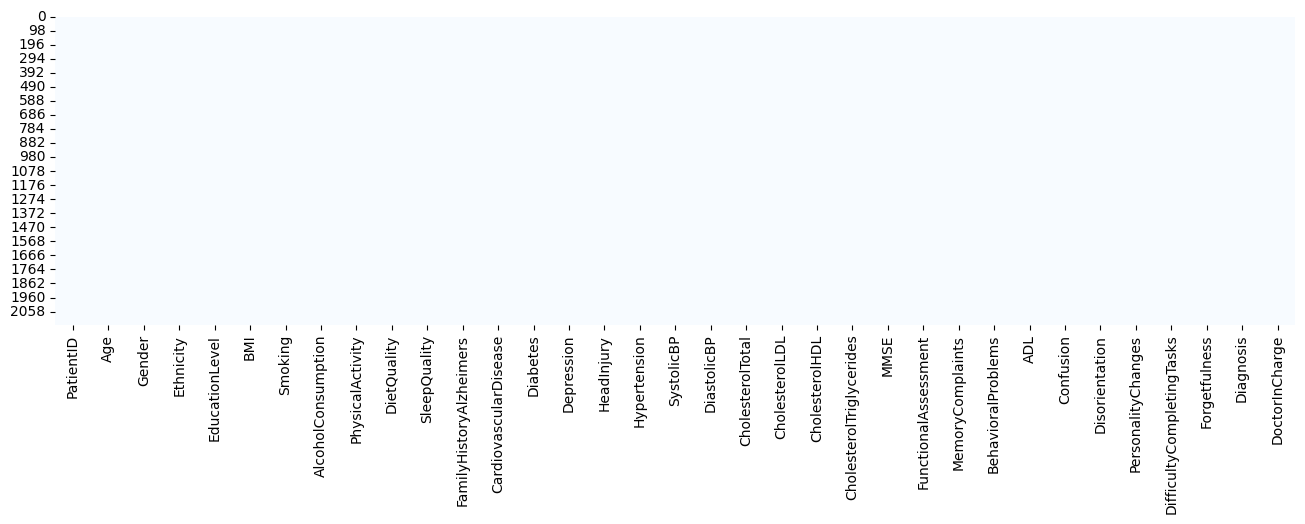

In [11]:
plt.figure(figsize=(16, 4))
sns.heatmap(data.isnull(), cmap="Blues", cbar=False)
plt.show()

There are no missing values in the dataset.

---

### Dataframe types

In [12]:
data.dtypes.value_counts()

,count
int64,22
float64,12
object,1


### Unique values per feature

Let's check the unique values per feature for all 3 datatypes

#### Datatype `int64`

In [13]:
for column in data.columns[data.dtypes == "int64"]:
    print(f"{column}: {data[column].nunique()} unique values {data[column].unique()}\n")

PatientID: 2149 unique values [4751 4752 4753 ... 6897 6898 6899]

Age: 31 unique values [73 89 74 86 68 75 72 87 78 84 64 69 63 65 82 77 71 83 79 67 66 70 85 60
 88 62 81 61 80 90 76]

Gender: 2 unique values [0 1]

Ethnicity: 4 unique values [0 3 1 2]

EducationLevel: 4 unique values [2 0 1 3]

Smoking: 2 unique values [0 1]

FamilyHistoryAlzheimers: 2 unique values [0 1]

CardiovascularDisease: 2 unique values [0 1]

Diabetes: 2 unique values [1 0]

Depression: 2 unique values [1 0]

HeadInjury: 2 unique values [0 1]

Hypertension: 2 unique values [0 1]

SystolicBP: 90 unique values [142 115  99 118  94 168 143 117 130 131 165 145 137 124 148 154 132 144
 120 178 106 153 177 134 107 114  91  90 129  97 157 164 158  98  93 147
 102 127 162 136 105 150 100 156 121 173 161 119 163 126 169 108  96  92
 125 149 104 122 160 133  95 139 140 112 155 111 172 166 141 175 176 146
 135 101 116 123 152 174 110 167 138 170 151 128 103 159 109 179 113 171]

DiastolicBP: 60 unique values [ 72  64 1

#### Datatype `float64`

In [14]:
for column in data.columns[data.dtypes == "float64"]:
    print(f"{column}: {data[column].nunique()}")

BMI: 2149
AlcoholConsumption: 2149
PhysicalActivity: 2149
DietQuality: 2149
SleepQuality: 2149
CholesterolTotal: 2149
CholesterolLDL: 2149
CholesterolHDL: 2149
CholesterolTriglycerides: 2149
MMSE: 2149
FunctionalAssessment: 2149
ADL: 2149


#### Datatype `object`

In [15]:
for column in data.columns[data.dtypes == "object"]:
    print(f"{column}: {data[column].nunique()}")

DoctorInCharge: 1


In [16]:
numerical_features = []
categorical_features = []

for column in data.columns[1:-1]:
    unique_values = data[column].nunique()
    if unique_values < 4:
        categorical_features.append(column)
    else:
        numerical_features.append(column)
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['Age', 'Ethnicity', 'EducationLevel', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
Categorical features: ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


As we see `PatientID` can be our new index and `DoctorInCharge` has one value for all samples so we can drop it after analysis

---

### Check categorical data

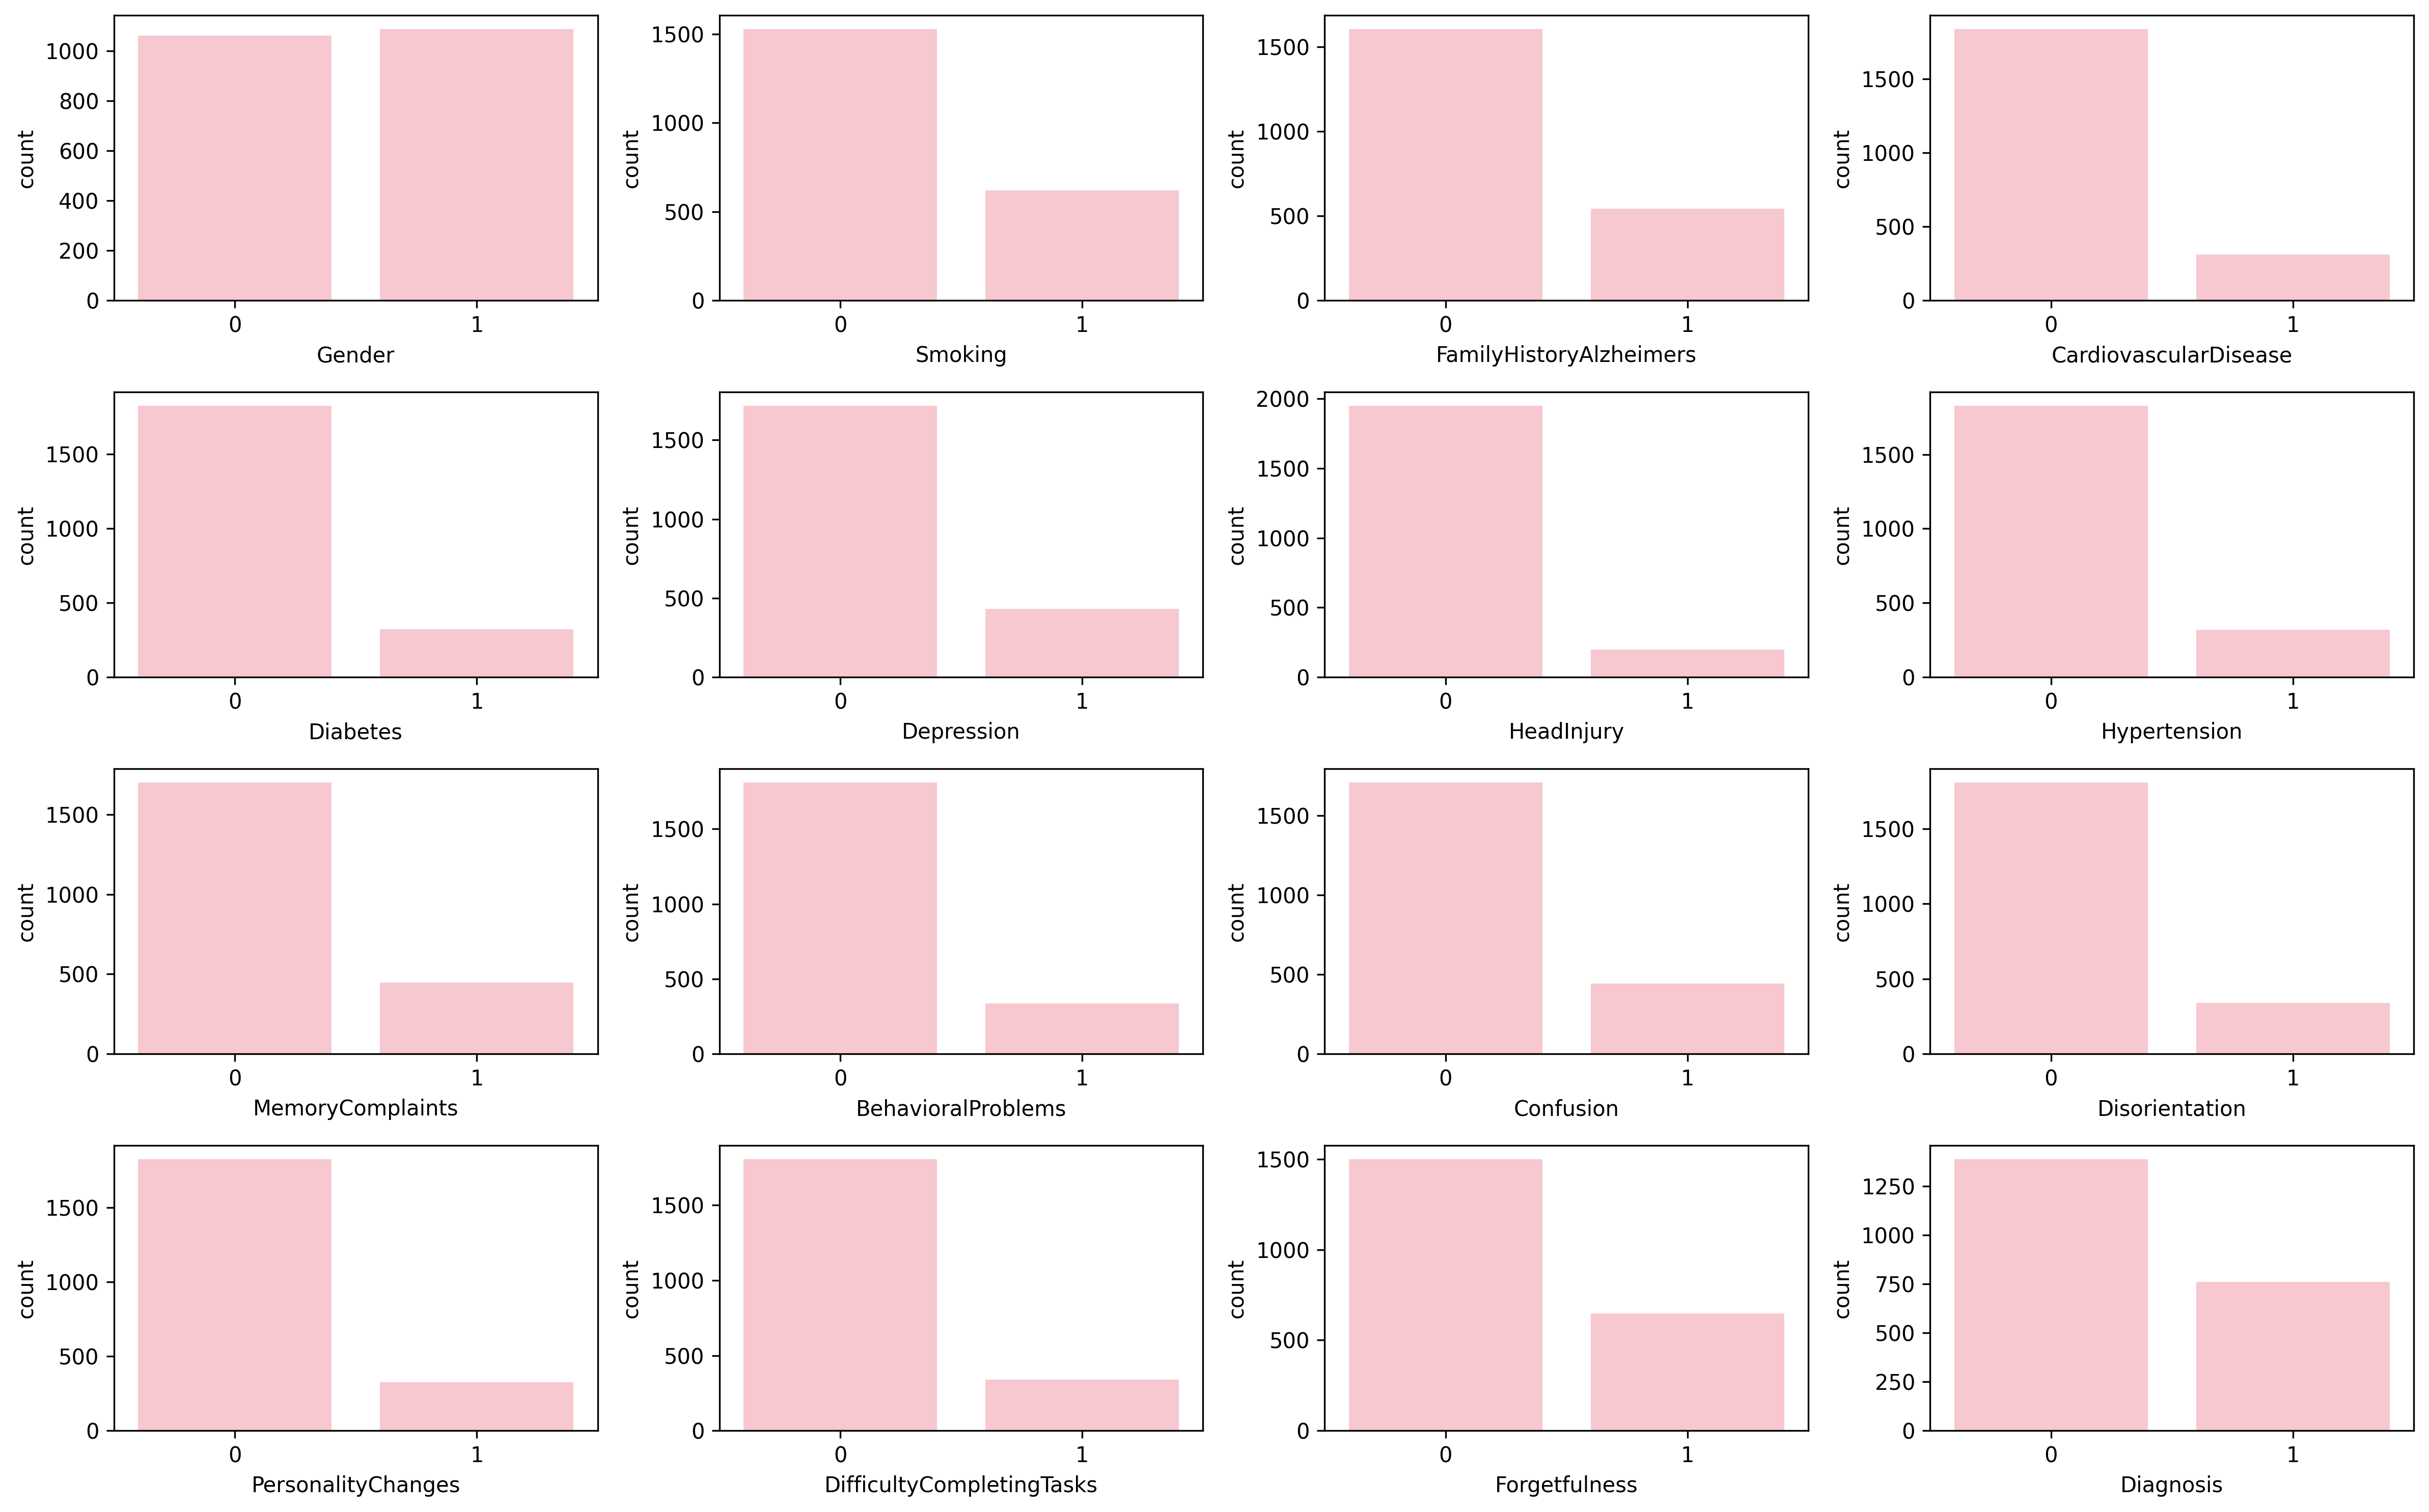

In [18]:
plt.figure(figsize=(16, 10), dpi=300)

for index, column in enumerate(categorical_features):
    plt.subplot(4, 4, index + 1)
    sns.countplot(x=column, data=data, color="Pink")

plt.tight_layout()
plt.show()

Overall, the dataset is composed of individuals without any diagnosed diseases or health conditions. The most represented demographic group is Caucasians. In terms of education,

### Check Numerical data

### Age Distribution of Patients

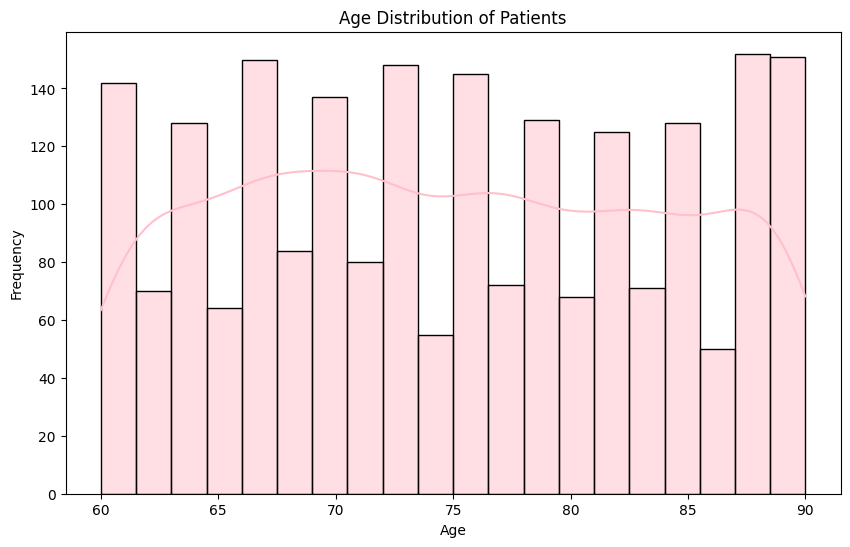

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='Pink')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The distribution appears relatively uniform, though some age ranges like 68–70 have slightly higher frequency

### BMI Distribution

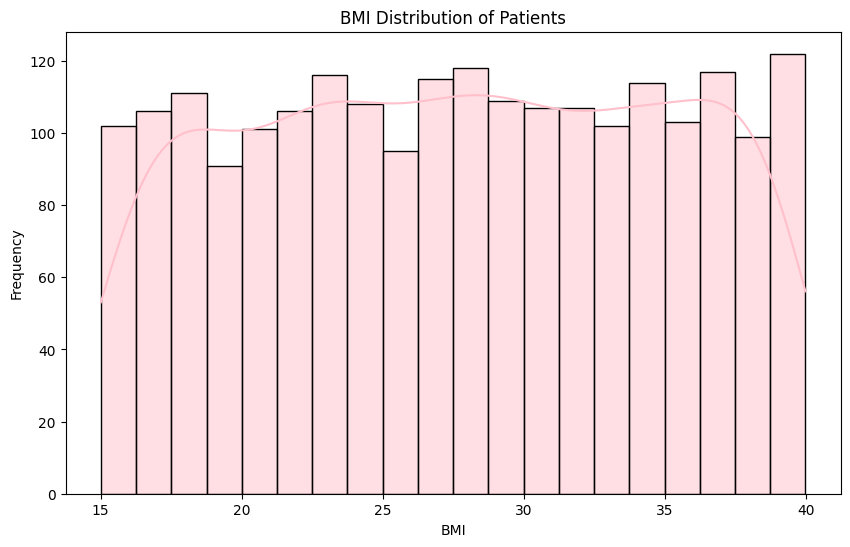

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], bins=20, kde=True, color='pink')
plt.title('BMI Distribution of Patients')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### target feature `Diagnosis`

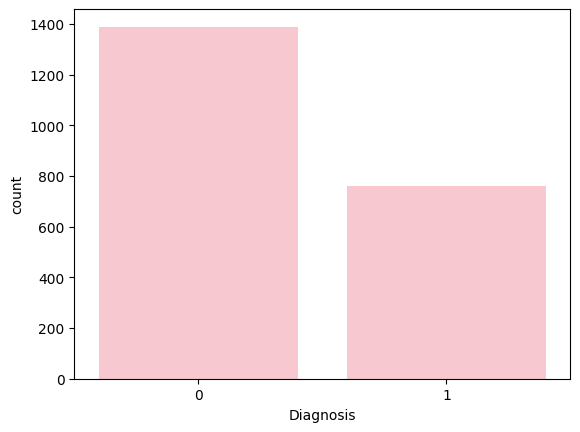

In [24]:
sns.countplot(x="Diagnosis", data=data, color="Pink")
plt.show()

In [26]:
def plot_count_with_diagnosis(data, x, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=x, hue='Diagnosis', data=data, palette='PuBu')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=['No Alzheimer\'s', 'Alzheimer\'s'])
    plt.show()

### Check relationship `Gender` and `Diagnosis`

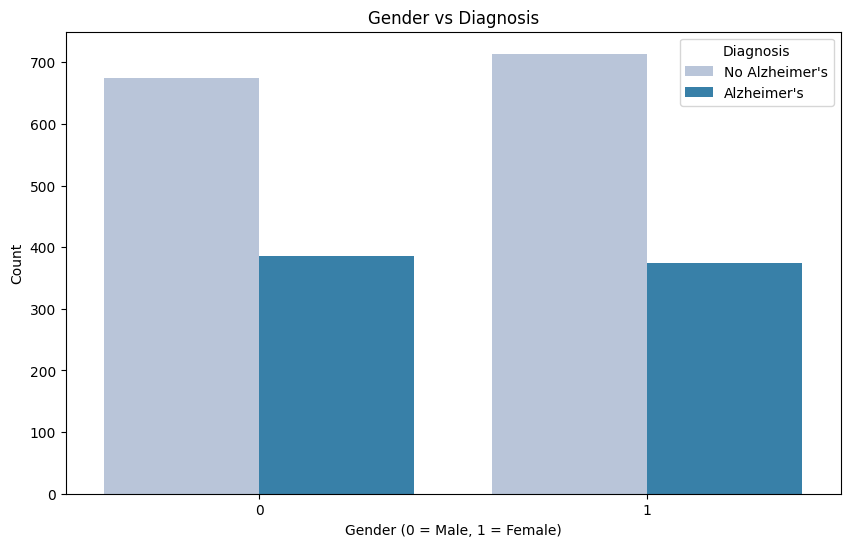

In [28]:
plot_count_with_diagnosis(data, 'Gender', 'Gender vs Diagnosis', "Gender (0 = Male, 1 = Female)")

### Check relationship `Ethnicity` and `Diagnosis`

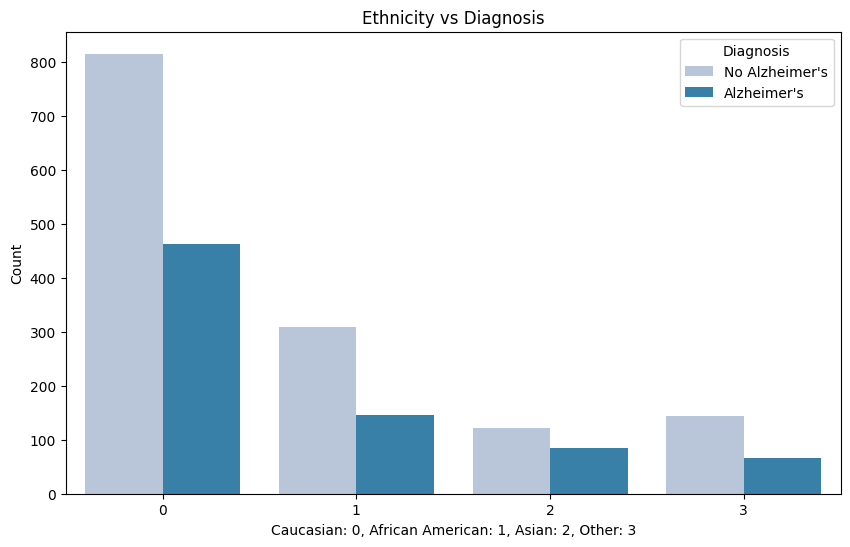

In [29]:
plot_count_with_diagnosis(
    data,
    "Ethnicity",
    "Ethnicity vs Diagnosis",
    "Caucasian: 0, African American: 1, Asian: 2, Other: 3",
)

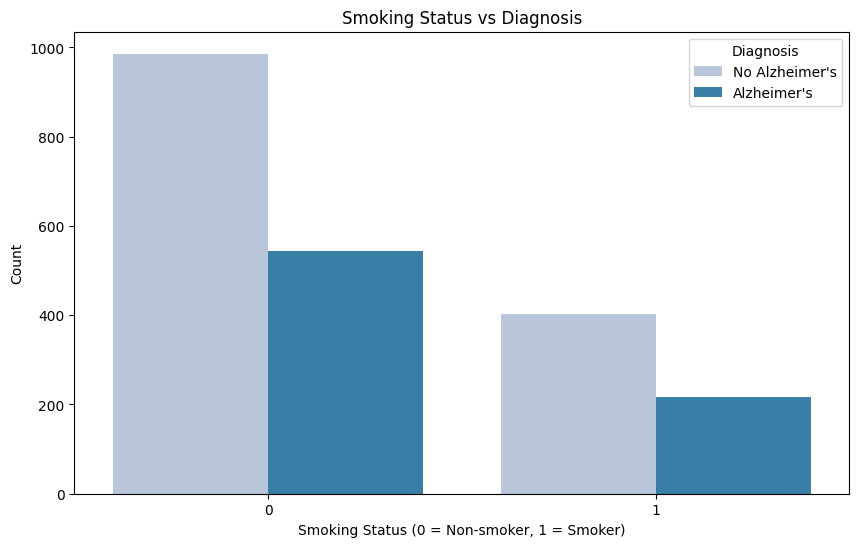

In [30]:
plot_count_with_diagnosis(
    data,
    "Smoking",
    "Smoking Status vs Diagnosis",
    "Smoking Status (0 = Non-smoker, 1 = Smoker)",
)

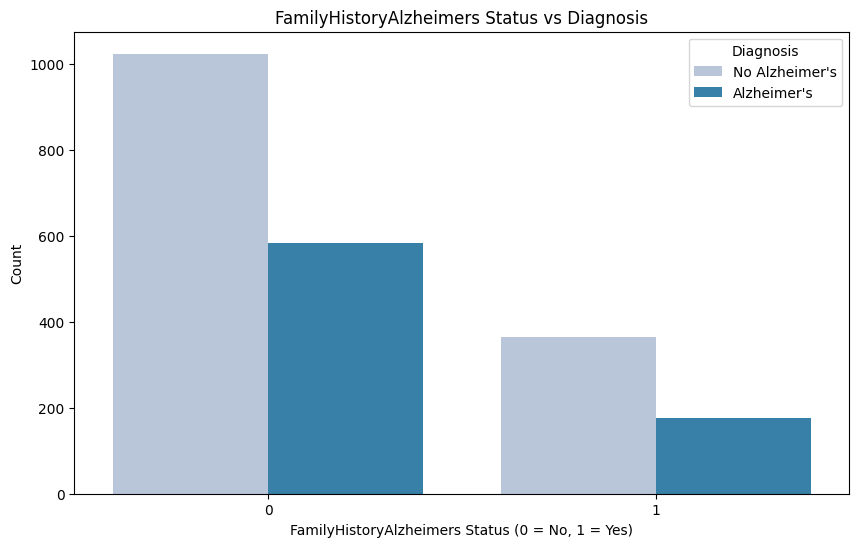

In [31]:
plot_count_with_diagnosis(
    data,
    "FamilyHistoryAlzheimers",
    "FamilyHistoryAlzheimers Status vs Diagnosis",
    "FamilyHistoryAlzheimers Status (0 = No, 1 = Yes)",
)